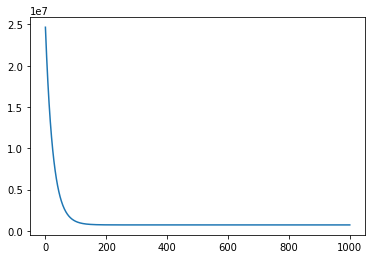

[ 0.68386897 79.90573681]


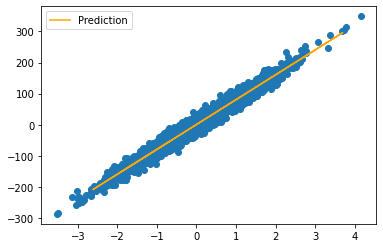

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfx=pd.read_csv('/content/Linear_X_Train.csv')
dfy=pd.read_csv('/content/Linear_Y_Train.csv')

x=dfx.values
y=dfy.values

x=x.reshape((-1,))
y=y.reshape((-1,))

x=(x-x.mean())/x.std()


def hypothesis(x,theta):
  return theta[0]+theta[1]*x

def error(x,y,theta):
  error=0

  for i in range(x.shape[0]):
    hx=hypothesis(x[i],theta)
    error+=(hx-y[i])**2

  return error

def gradient(x,y,theta):
  grad=np.zeros((2))
  m=x.shape[0]
  for i in range(x.shape[0]):
    hx=hypothesis(x[i],theta)
    grad[0]=grad[0]+hx-y[i]
    grad[1]=grad[1]+(hx-y[i])*x[i]

  return grad/m

def gradientDescent(x,y,learning_rate=0.02):
  theta=np.zeros((2))
  itr=0
  error_list=[]
  theta_list=[]

  while(itr<=1000):
    grad=gradient(x,y,theta)
    err=error(x,y,theta)
    error_list.append(err)
    theta_list.append(theta)
    theta[0]=theta[0]-(grad[0]*learning_rate)
    theta[1]=theta[1]-(grad[1]*learning_rate)
    itr=itr+1

  return theta,error_list,theta_list

final_theta,error_list,theta_list=gradientDescent(x,y)
plt.plot(error_list)
plt.show()

print(final_theta)

xtest=pd.read_csv('/content/Linear_X_Test.csv')

xtest=xtest.values
xtest=xtest.reshape((-1,))
plt.scatter(x,y)
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Prediction')
plt.legend()
plt.show()